<h2 style="text-align: center;">Statistics & Linear Model Lab2</h2>
<h3 style="text-align: center;">Wenjie Hu</h3>
<h3 style="text-align: center;">19/11/2023</h3>

---

![ex1](./imgs/ex1.jpg)

### EX1

In [ ]:
install.packages(c('MASS','ggplot2','stats'))
library(MASS)
library(ggplot2)
library(stats)

In [1]:
ps <- c(0.1, 0.3, 0.5, 0.7, 0.9)
num_experiments = 10000
n = 50
Ps_means <- c()
P_hat <-c()
variance_means <- c()
mse_means <- c()
bias_means <- c()

In [2]:
library(stats)
set.seed(2)
for (p in ps) {
  p_hats <- c()
  Ps <- c()
  for (i in 1:num_experiments) {
    X <- rbinom(n = n, size = 5, prob = p)
    p_hat <- mean(X) / 5
    #P(x >= 3)
    P <- 1 - pbinom(2, size = 5, prob = p_hat)
    Ps <- c(Ps, P)
    p_hats <- c(p_hats, p_hat)
  }
  
  cat(
    paste(
      "True p =", p,
      "mean p_hat =", mean(p_hats),
      "var p_hat =", var(p_hats),
      "MSE p_hat =", mean((p_hats - p)^2),
      "bias p_hat =", mean(p_hats - p),
      "mean P =", mean(Ps),
      "\n"
    ))
  true_P <- 1 - pbinom(2, size = 5, prob = p)
  P_hat <- c(P_hat, mean(p_hats))
  variance_means <- c(variance_means, var(Ps))
  mse_means <- c(mse_means, mean((Ps - true_P)^2))
  bias_means <- c(bias_means, mean(Ps - true_P))
}

True p = 0.1 mean p_hat = 0.1002848 var p_hat = 0.000367686857645765 MSE p_hat = 0.0003677312 bias p_hat = 0.000284799999999996 mean P = 0.00942658840830895 
True p = 0.3 mean p_hat = 0.3001684 var p_hat = 0.000843699211361136 MSE p_hat = 0.0008436432 bias p_hat = 0.0001684 mean P = 0.165411401160482 
True p = 0.5 mean p_hat = 0.50003 var p_hat = 0.00101302360236024 MSE p_hat = 0.0010129232 bias p_hat = 2.99999999999997e-05 mean P = 0.500049334589819 
True p = 0.7 mean p_hat = 0.6998628 var p_hat = 0.000848416417801781 MSE p_hat = 0.000848350400000001 bias p_hat = -0.000137199999999995 mean P = 0.834619086272312 
True p = 0.9 mean p_hat = 0.9001616 var p_hat = 0.000359421027542753 MSE p_hat = 0.000359411199999999 bias p_hat = 0.000161599999999999 mean P = 0.990703129130912 


In [3]:
result_df <- data.frame(
  "p" = ps,
  "p_hat" = P_hat,
  "variance_means" = variance_means,
  "mse_means" = mse_means,
  "bias_means" = bias_means
)
print(result_df)

    p     p_hat variance_means    mse_means    bias_means
1 0.1 0.1002848   2.572595e-05 2.647435e-05  8.665884e-04
2 0.3 0.3001684   1.482633e-03 1.487921e-03  2.331401e-03
3 0.5 0.5000300   3.502506e-03 3.502158e-03  4.933459e-05
4 0.7 0.6998628   1.492080e-03 1.497225e-03 -2.300914e-03
5 0.9 0.9001616   2.443480e-05 2.497533e-05 -7.368709e-04


In this task, we generated sample of size $n$=50 from binomia distribution, and calculated MLE of the quantity $P(X\geq3)$ where $X$~$b(5,p)$. In order to get the result, we need to calcualte the $\hat{p}$ firstly, which can be formulated as ${\hat{p}}=\frac{\sum x_{i}}{5\cdot n}$, and then we repeated the experiment for 10000 times and get the variance, MSE and Bias.

Here are the results from 10000 times repeated experiment.
| $P$    |  $\hat{P}$      | Variance    | MSE | Bias |
|-------| ----------|---- |------------| -----------|
|0.1    |0.1002848|2.572595e-05 |2.647435e-05|8.665884e-04|
|0.3    |0.3001684|1.482633e-03 |1.487921e-03|2.331401e-03|
|0.5    |0.5000300|3.502506e-03 |3.502158e-03|4.933459e-05|
|0.7    |0.6998628|1.492080e-03 |1.497225e-03|-2.300914e-03|
|0.9    |0.9001616|2.443480e-05 |2.497533e-05|-7.368709e-04|

AS wen can see from above table, we observe that the $\hat{p}$ are very close to the true $p$, therefore the MSE and bias are both in a small value, as well as we did the experments 10000 times, the sample data is close to the model predicated, so teh variance is also in a small value.



___

![ex2](./imgs/ex2.jpg)

### EX2

In [10]:
library(stats)
n=50
lams <- c(0.5, 1, 2, 5)
xes <- 0:10
lambdas <-c()
lam_hats_means <- c()
Ps_means <- c()
variance_means <- c()
mse_means <- c()
bias_means <- c()
set.seed(3)
for (lam in lams){
  for (x in xes) {
    lam_hats <- c()
    Ps <- c()    
    for (i in 1:10000) {
      X <- rpois(n = n, lambda = lam)
      # Calculate MLE lam_hat
      lam_hat <- mean(X)
      # Calculate P(X = x)
      P <- dpois(x, lam_hat)
      Ps <- c(Ps, P)
      lam_hats <- c(lam_hats, lam_hat)
    }   
    # cat(
    #   paste(
    #     "X =", x,
    #     "lam =", lam,
    #     "var =", var(lam_hats),
    #     "MSE =", mean((lam_hats - lam)^2),
    #     "bias =", mean(lam_hats - lam),
    #     "mean_P =", mean(Ps),
    #     "\n"
    #   )
    # )
    true_P <- dpois(x, lam_hat)
    lambdas <- c(lambdas, lam)
    lam_hats_means <- c(lam_hats_means, mean(lam_hats))
    variance_means <- c(variance_means, var(Ps))
    mse_means <- c(mse_means, mean((Ps - true_P)^2))
    bias_means <- c(bias_means, mean(Ps - true_P))
    Ps_means <- c(Ps_means, mean(Ps))
  }
}

In [11]:
result_df <- data.frame(
  "X" = xes,
  "lambda" = lambdas,
  "lam_hats" = lam_hats_means,
  "P_means" = Ps_means,
  "variance_means" = variance_means,
  "mse_means" = mse_means,
  "bias_means" = bias_means
)
# print.data.frame(result_df)

For the second task we generated the sample size $n$= 50 from Poisson distribution with the parameter $\lambda$. firstly we need to calculate MLE $\hat{\lambda}$ which could be calculate using $\hat{\lambda}=\frac{\sum_{i=1}^{n}{x}_{i}}{n}$ and then we calculate the MLE of the quantity. After 10000 times repeated experiments, here are the results that we got.

|$x$| $\lambda$ | $\hat{\lambda}$ | $P(X=x)$ |Variance|   MSE  | Bias|
|--|----|---|---|-----|---|---|
|0|0.5|0.499070|6.101608e-01|3.719543e-03|6.245485e-03|5.026246e-02|
|1|0.5|0.500772|2.990717e-01|9.236171e-04|5.372955e-03|6.670405e-02|
|2|0.5|0.500288|7.626420e-02|5.092389e-04|5.261210e-04|-4.114983e-03|
|3|0.5|0.500316|1.346779e-02|4.228111e-05|6.473843e-05|-4.739361e-03|
|4|0.5|0.500044|1.848681e-03|1.664694e-06|1.906558e-06|-4.919659e-04|
|5|0.5|0.500230|2.104393e-04|3.893594e-08|8.354451e-07|-8.924758e-04|
|6|0.5|0.501090|2.037669e-05|5.453618e-10|1.442313e-09|-2.995006e-05|
|7|0.5|0.500710|1.761394e-06|6.852852e-12|6.897649e-12|2.132663e-07|
|8|0.5|0.500498|1.348976e-07|5.899484e-14|6.738892e-14|9.165139e-08|
|9|0.5|0.499162|9.065613e-09|3.575403e-16|1.034785e-14|-9.995170e-08|
|10|0.5|0.500504|5.897906e-10|1.976195e-18|2.081419e-18|-3.246864e-10|
|0|1.0|1.000808|3.713191e-01|2.785770e-03|6.886662e-03|6.404038e-02|
|1|1.0|1.000742|3.642128e-01|2.828441e-05|2.062266e-04|1.333960e-02|
|2|1.0|0.998808|1.819329e-01|6.480167e-04|9.462809e-04|1.727220e-02|
|3|1.0|0.997208|6.157038e-02|2.908480e-04|4.999074e-04|1.445989e-02|
|4|1.0|0.997950|1.597830e-02|4.381359e-05|1.028110e-04|7.681265e-03|
|5|1.0|1.000008|3.401090e-03|3.566136e-06|2.888015e-05|-5.031339e-03|
|6|1.0|0.999440|6.087738e-04|1.883281e-07|2.629241e-07|2.731571e-04|
|7|1.0|1.001116|9.635463e-05|7.293480e-09|9.479302e-09|-4.676058e-05|
|8|1.0|0.998480|1.314389e-05|1.947730e-10|2.109131e-10|4.019893e-06|
|9|1.0|0.999282|1.668132e-06|4.702614e-12|6.573723e-12|1.368057e-06|
|10|1.0|1.000188|1.890062e-07|7.626212e-14|1.059501e-13|1.723240e-07|
|0|2.0|2.001136|1.378261e-01|7.417883e-04|1.725640e-03|3.136760e-02|
|1|2.0|1.999910|2.706477e-01|7.146553e-04|1.437674e-03|-2.689033e-02|
|2|2.0|2.000054|2.679380e-01|1.461025e-05|1.756443e-05|-1.719197e-03|
|3|2.0|2.000048|1.786335e-01|3.264811e-04|3.763347e-04|-7.063021e-03|
|4|2.0|1.999632|9.018967e-02|3.136468e-04|8.535957e-04|-2.323747e-02|
|5|2.0|2.001880|3.689011e-02|1.165307e-04|1.011177e-03|-2.991083e-02|
|6|2.0|1.997628|1.255707e-02|2.422539e-05|2.450098e-05|5.272692e-04|
|7|2.0|1.996800|3.721556e-03|3.491037e-06|4.233981e-06|-8.621444e-04|
|8|2.0|2.001810|9.864089e-04|3.557713e-07|1.278978e-06|-9.608552e-04|
|9|2.0|2.003398|2.327025e-04|2.724445e-08|4.125966e-08|1.183974e-04|
|10|2.0|1.998976|4.881888e-05|1.645648e-09|3.350774e-09|4.129516e-05|
|0|5.0|4.996190|7.108523e-03|5.215132e-06|5.626724e-06|-6.419606e-04|
|1|5.0|4.999438|3.472266e-02|7.738697e-05|3.223223e-04|1.565066e-02|
|2|5.0|4.999606|8.540646e-02|2.566252e-04|8.132784e-04|2.359404e-02|
|3|5.0|4.999150|1.406755e-01|2.974857e-04|5.398514e-04|-1.556905e-02|
|4|5.0|4.995990|1.745419e-01|1.193771e-04|1.666290e-04|-6.874872e-03|
|5|5.0|5.001284|1.737566e-01|5.590169e-06|6.926928e-06|-1.156425e-03|
|6|5.0|5.000838|1.448319e-01|8.527473e-05|1.561044e-04|-8.416546e-03|
|7|5.0|5.002340|1.039242e-01|1.663929e-04|1.682088e-04|-1.353722e-03|
|8|5.0|4.999944|6.540356e-02|1.475071e-04|1.524591e-04|-2.228638e-03|
|9|5.0|4.999560|3.674709e-02|8.262976e-05|1.132275e-04|5.532268e-03|
|10|5.0|5.000196|1.868104e-02|3.448015e-05|3.478948e-05|-5.592706e-04|

From the table, we can observe that the $\hat{\lambda}$ is very close to the true $\lambda$, and also we clearly see that we can estimate the search probability better when $\lambda$ is small and at the same time, we get the best results when $x$ is increasing, this is because the probability of noise outliers is smaller in this case. A significantly small MSE and bias proved our observation, which also means that our estimator is proper.

---

![ex3](./imgs/ex3.jpg)

### EX3

In [9]:
thetas <- c(0.5, 1, 2, 5)
True_thetas <- c()
mean_theta_hats <- c()
mean_Fs <- c()
mean_Ys <- c()

True theta = 0.5 mean theta_hat = 0.5112235 mean F = 4.063713 mean Y = 0.01389481 
[1] "Test shapiro: 0.0251276859556913"


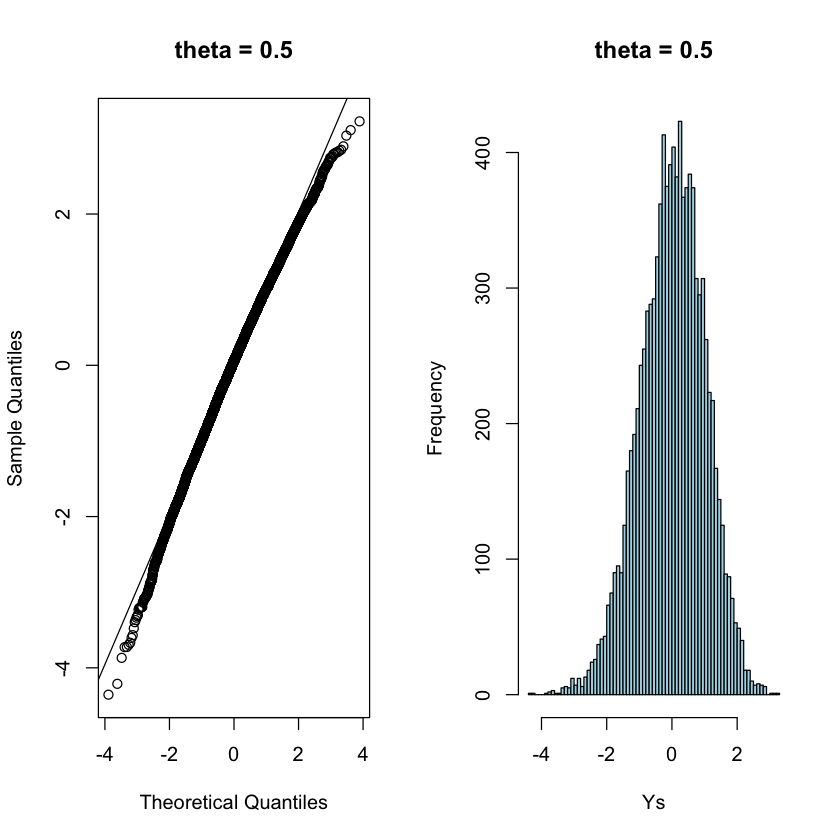

True theta = 1 mean theta_hat = 1.018365 mean F = 1.02443 mean Y = -0.01505982 
[1] "Test shapiro: 0.000322333902161472"


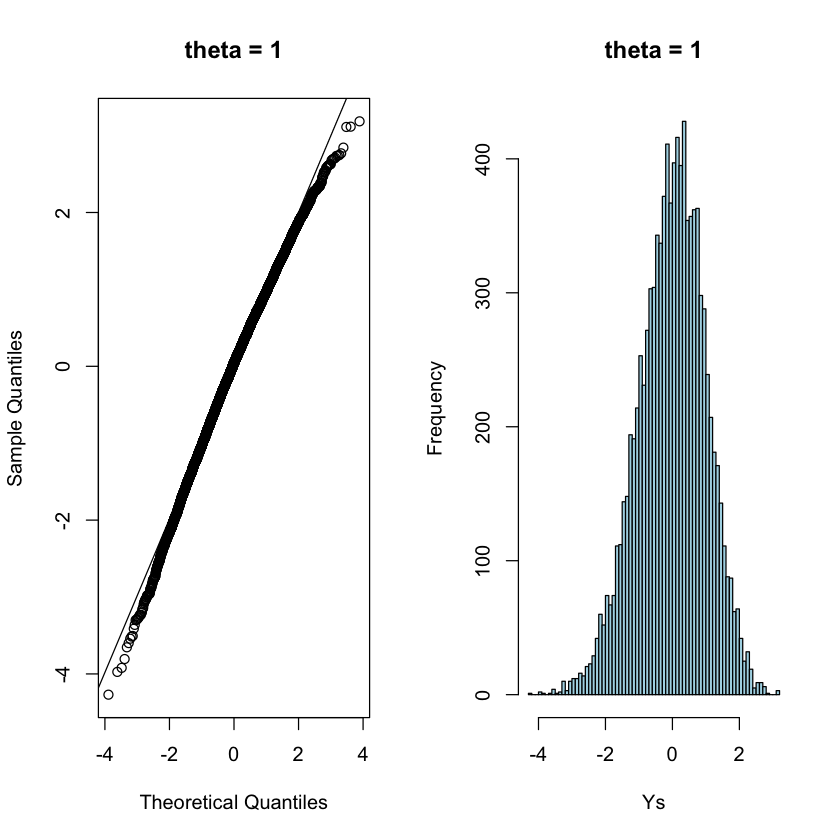

True theta = 2 mean theta_hat = 2.037559 mean F = 0.2559864 mean Y = -0.0128729 
[1] "Test shapiro: 1.6380715230337e-05"


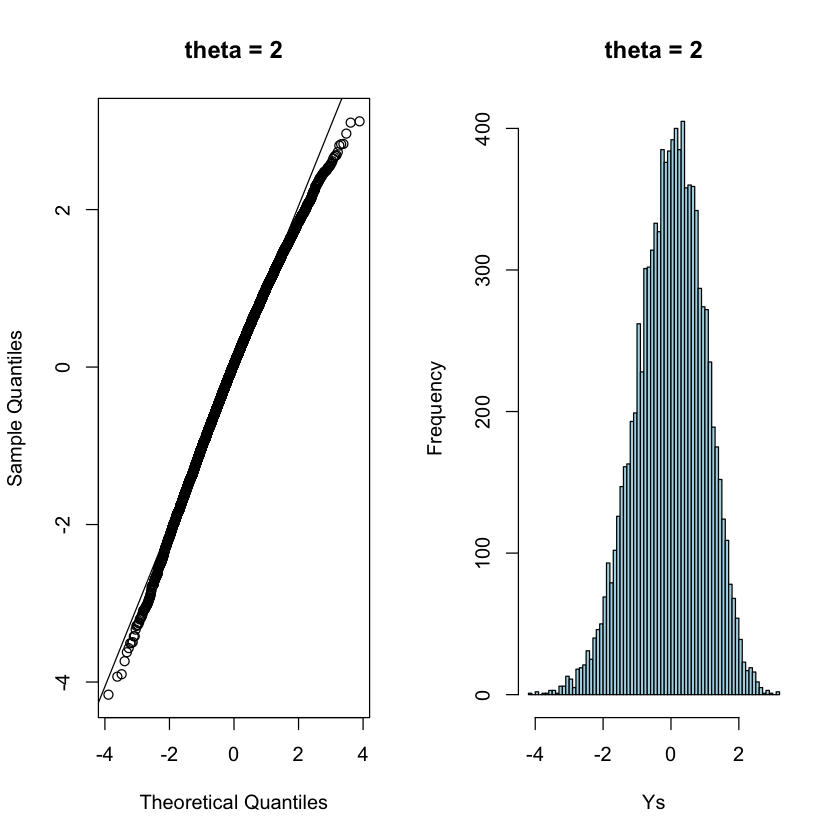

True theta = 5 mean theta_hat = 5.105929 mean F = 0.04078089 mean Y = 0.002904423 
[1] "Test shapiro: 0.0881999489609777"
  theta theta_hat     mean_F       mean_Y
1   0.5 0.5112235 4.06371316  0.013894814
2   1.0 1.0183652 1.02443010 -0.015059816
3   2.0 2.0375588 0.25598639 -0.012872899
4   5.0 5.1059292 0.04078089  0.002904423


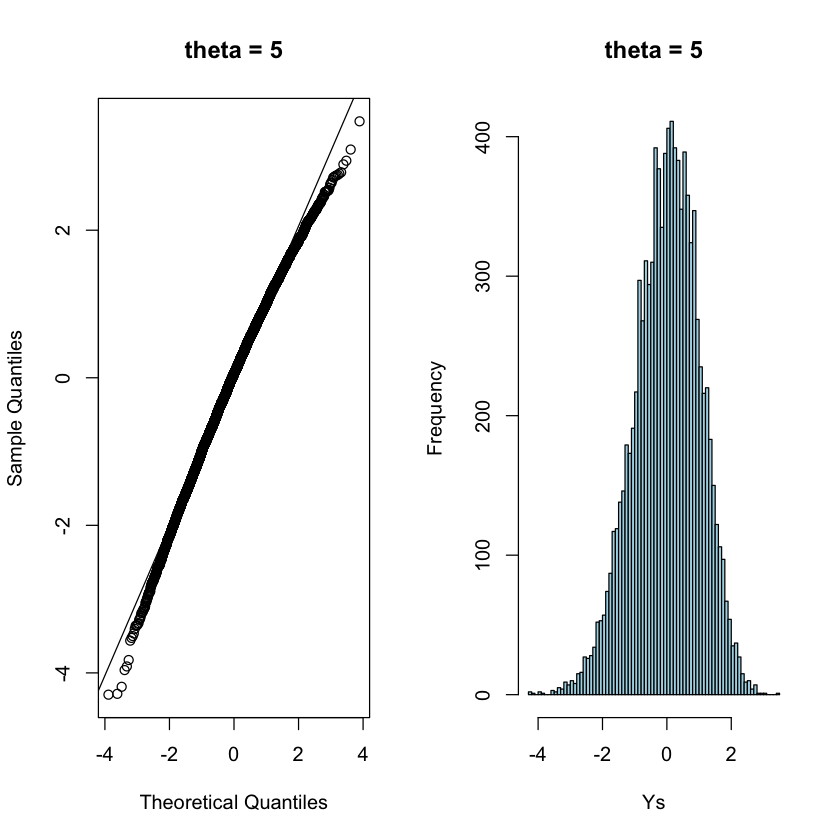

In [10]:
set.seed(4)
for (theta in thetas) {
  theta_hats <- c()
  fisher_information <- c()
  Ys <- c()
  N <- 50
  for (i in 1:10000) {
    X <- rbeta(n = N, shape1 = theta, shape2 = 1)
    theta_hat <- -N / sum(log(X))
    fisher <- 1 / (theta_hat^2)
    Y <- sqrt(N * fisher) * (theta_hat - theta)
    Ys <- c(Ys, Y)
    fisher_information <- c(fisher_information, fisher)
    theta_hats <- c(theta_hats, theta_hat)
  }

  par(mfrow = c(1, 2))  # Set up a 1x2 layout
  qqnorm(Ys, main = paste("theta =", theta))
  qqline(Ys)
  hist(Ys, breaks = 80, col = "lightblue", border = "black",
       main = paste("theta =", theta))


  True_thetas <- c(True_thetas, theta)
  mean_theta_hats <- c(mean_theta_hats, mean(theta_hats))
  mean_Fs <- c(mean_Fs, mean(fisher_information))
  mean_Ys <- c(mean_Ys, mean(Ys))
  
  shapiro_test <- shapiro.test(Ys[1:1000])
  
  cat(
      "True theta =", theta,
      "mean theta_hat =", mean(theta_hats),
      "mean F =", mean(fisher_information),
      "mean Y =", mean(Ys),"\n")
  print(paste("Test shapiro:", shapiro_test$p.value))
}
result_df <- data.frame(
  "theta" = True_thetas,
  "theta_hat" = mean_theta_hats,
  "mean_F" = mean_Fs,
  "mean_Y" = mean_Ys
)
print(result_df)

For ex3 we generated a sample of size $n=50$ from beta distribution, and we wanted to calculate the MLE of Fisher information $\widehat{I(\theta)}$ and $Y$. Firstly we calcualte the $\hat{\theta}$ by using $\hat{\theta}=\frac{-n}{\sum\log x_{i}}$, and for Fisher information we can calculate it by using $\widehat{I{\theta}}=\frac{1}{\hat{\theta}^{2}}$, then once we got the Fish information, we will be able to calculate $Y=\sqrt{n\widehat{I(\theta)}}\cdot(\hat{\theta}-\theta)$, we repeated the experiment 10000 times, and here is the result.
| $\theta$ |$\hat{\theta}$ | F=$\widehat{I(\theta)}$ | Y |
|---------|-----------|------|-----|
|0.5|0.5112235|4.06371316|0.013894814|
|1.0|1.0183652|1.02443010|-0.015059816|
|2.0|2.0375588|0.25598639|-0.012872899|
|5.0|5.1059292|0.04078089|0.002904423|

We may intuitively judge the histogram above that $Y$ could be from a normal distribution because it fits the features of a normal distribution, but when we look at the Q-Q plot on the left side of the histogram, it deviates from the norm distribution, and also the results of Shapiro test confirms this,  the smaller p-value calculated by the Shapiro test gives us a reason to reject the null hypothesis.


---

![ex4](./imgs/ex4.jpg)

### EX4

In [ ]:
install.packages("jmuOutlier")
library(jmuOutlier)

In [8]:
Thetas <- c(1, 4, 1)
Sigmas <- c(1,1,2)
n = 50
W <- runif(n,0,1)
W <- W/sum(W)
i <- seq(1,n)
W2 <- dnorm(qnorm((i - 1) / n)) - dnorm(qnorm(i / n))

In [9]:
rLaplace <- function(n, mu=0, b=1,params=list(mu, b),...){
  if(!missing(params)){
    mu <- params$mu
    b <- params$b}
  u<-stats::runif(n)-0.5
  x<-mu-b*sign(u)*log(1-2*abs(u))
}

In [10]:
set.seed(5)
for (i in 1:length(Thetas)) {
  theta <- Thetas[i]
  sigma <- Sigmas[i]
  theta_hats_1 <- c()
  theta_hats_2 <- c()
  theta_hats_3 <- c()
  theta_hats_4 <- c()

  for (j in 1:10000) {
    X <- sort(rLaplace(n, theta, sigma))

    theta_hat_1 <- mean(X)
    theta_hats_1 <- c(theta_hats_1, theta_hat_1)

    theta_hat_2 <- median(X)
    theta_hats_2 <- c(theta_hats_2, theta_hat_2)

    theta_hat_3 <- sum(X * W)
    theta_hats_3 <- c(theta_hats_3, theta_hat_3)

    theta_hat_4 <- sum(X * W2)
    theta_hats_4 <- c(theta_hats_4, theta_hat_4)
  }
  cat(
      "True theta =", theta,
      "True sigma =", sigma,
      "\n")
  df <- data.frame(
    "Variance" = c(var(theta_hats_1), var(theta_hats_2), 
                  var(theta_hats_3), var(theta_hats_4)),
    "MSE" = c(mean((theta_hats_1 - theta)^2), mean((theta_hats_2 - theta)^2), 
              mean((theta_hats_3 - theta)^2), mean((theta_hats_4 - theta)^2)),
    "Bias" = c(mean(theta_hats_1 - theta), mean(theta_hats_2 - theta), 
              mean(theta_hats_3 - theta), mean(theta_hats_4 - theta))
  )
  rownames(df) <- c("theta_1", "theta_2", "theta_3", "theta_4")
  print(df)
  cat("\n")
}

True theta = 1 True sigma = 1 
          Variance        MSE          Bias
theta_1 0.03964663 0.03964353 -0.0009301979
theta_2 0.02435504 0.02435396 -0.0011642635
theta_3 0.04147800 0.04172106  0.0157229978
theta_4 0.03950960 0.15517388  0.3401003231

True theta = 4 True sigma = 1 
          Variance        MSE         Bias
theta_1 0.04028413 0.04028460 -0.002118765
theta_2 0.02435694 0.02435774 -0.001797432
theta_3 0.04201020 0.04222716  0.014871596
theta_4 0.03967914 7.15043546 -2.666600885

True theta = 1 True sigma = 2 
          Variance        MSE         Bias
theta_1 0.16376075 0.16380494 -0.007782285
theta_2 0.09831539 0.09834966 -0.006641137
theta_3 0.17086072 0.17151550  0.025920536
theta_4 0.15891697 2.93994987  1.667647683



In this task, we generated a sample of size $n$=50 from the Laplace distribution with different parameters $\theta$ and $\sigma$. For the estimator, we calculate in four different ways as follows.  
(i) $\hat{\theta_1}=\overline{X}=\frac{1}{n}\sum\nolimits_{i=1}^{n}X_i$  
(ii) $\hat{\theta_2}=Me\left\{ X_{1,}\ldots,X_{n}\right\}$  
(iii) $\hat{\theta_3}=\sum_{i=1}^{n}w_{i}X_{i}, \sum_{i=1}^{n}w_i=1,0\le{w_i}\le1, i=1,...,n$  
(iv) $\hat{\theta_4}=\sum_{i=1}^{n}w_iX_{i:n}$, where $X_{1:n}\le...\le{X_{n:n}}$ are the order statistics from the sample $X_1,...,X_n$, $w_{i}=\phi\left({\Phi^{-1}({\frac{i-1}{n}})}\right)-\phi\left({\Phi^{-1}({\frac{i}{n}})}\right)$  
Then we repeat the experiment 10000 times for those estimators, the mean of results we presented below.  
(a)
|$\theta=1,\sigma=1$|Variance|MSE|Bias|
|:--:|--|--|--|
|$\hat{\theta_1}$|0.04080004|0.04079787|-0.0013833395|
|$\hat{\theta_2}$|0.02502176|0.02501935|0.0002974247|
|$\hat{\theta_3}$|0.04536467|0.07524161|-0.1728625686|
|$\hat{\theta_4}$|0.03970698|0.15379429|0.3377740031|  

(b)
|$\theta=4,\sigma=1$|Variance|MSE|Bias|
|:--:|--|--|--|
|$\hat{\theta_1}$|0.03987586|0.03987246|7.696285e-04|
|$\hat{\theta_2}$|0.02435949|0.02435705|3.195176e-05|
|$\hat{\theta_3}$|0.04432903|0.07358114|-1.710454e-01|
|$\hat{\theta_4}$|0.03821810|7.14218395|-2.665327e+00|  

(c)
|$\theta=1,\sigma=2$|Variance|MSE|Bias|
|:--:|--|--|--|
|$\hat{\theta_1}$|0.15898863|0.15897763|0.002213072|
|$\hat{\theta_2}$|0.09509776|0.09512526|0.006083161|
|$\hat{\theta_3}$|0.17792193|0.29396166|-0.340672170|
|$\hat{\theta_4}$|0.15798814|2.94345999|1.668978027|


From those tables, we may note that the $\hat{\theta_1}$ performed well compared to the $\hat{\theta_3}$ and $\hat{\theta_4}$ since the Laplace distribution is symmetrical, but the $\hat{\theta_2}$ is the optimal estimator as it has the lowest variance and MSE, but it doesn't surprised us because for $n$ i.i.d sample of Laplace distribution, the MLE estimator of $\hat{\theta}$ is the sample median $\hat{\theta}=med{(x)}$.

---

![ex5](./imgs/ex5.jpg)

In this task we repeat the previous experiment, but we change the size of sample $n$=20 and $n$=100. Here are the results of the experiment for Exercise 1.

<table>
<tr><th>for n=20 </th></tr>
<td>

|p|p_hat|variance_means|mse_means|bias_means|
|---|---|---|----|---|
|0.1|0.100543|7.579309e-05|8.010760e-05|0.0020789622|
|0.3|0.300006|3.773300e-03|3.801084e-03|0.0053067340|
|0.5|0.499732|8.266745e-03|8.266169e-03|-0.0005002931|
|0.7|0.699407|3.717515e-03|3.752977e-03|-0.0059860889|
|0.9|0.899987|7.373241e-05|7.755535e-05|-0.0019571195|
</td>
</table>

<table>
<tr><th>for n=100 </th></tr>
<td>

|p|p_hat|variance_means|mse_means|bias_means|
|---|---|---|----|---|
|0.1|0.1001064|1.138100e-05|1.155237e-05|4.153378e-04|
|0.3|0.2999824|7.519115e-04|7.529428e-04|1.051909e-03|
|0.5|0.4999844|1.735859e-03|1.735686e-03|-3.111669e-05|
|0.7|0.6999482|7.509237e-04|7.521489e-04|-1.140331e-03|
|0.9|0.8998602|1.179441e-05|1.197590e-05|-4.273871e-04|
</td>
</table>

For Exercise 2, we set $n$=20 and $n$=100 and repeat the same experiment 10000 times.
<p style="text-align: center;">n=20</p>

|$x$| $\lambda$ | $\hat{\lambda}$ | $P(X=x)$ |Variance|   MSE  | Bias|
|--|----|---|---|-----|---|---|
|0|0.5|0.502435|6.125046e-01|8.982243e-03|1.303814e-02|6.369298e-02|
|1|0.5|0.500455|2.921546e-01|2.460371e-03|2.487393e-03|5.221891e-03|
|2|0.5|0.500475|7.687806e-02|1.201720e-03|1.266380e-02|-1.070617e-01|
|3|0.5|0.499380|1.458739e-02|1.171439e-04|2.083691e-04|9.551804e-03|
|4|0.5|0.500755|2.251121e-03|5.675528e-06|8.337503e-06|-1.631730e-03|
|5|0.5|0.498070|2.878292e-04|1.650417e-07|1.818936e-07|1.298785e-04|
|6|0.5|0.500375|3.383586e-05|4.093248e-09|4.021264e-08|-1.900521e-04|
|7|0.5|0.500830|3.521089e-06|8.264177e-11|8.285708e-11|4.728319e-07|
|8|0.5|0.501340|3.373031e-07|1.085866e-12|1.196892e-12|3.333674e-07|
|9|0.5|0.498545|2.859673e-08|1.216388e-14|1.298043e-14|2.859664e-08|
|10|0.5|0.501055|2.380339e-09|1.069971e-16|1.123712e-16|2.320507e-09|
|0|1.0|1.000690|3.770763e-01|7.138486e-03|7.874272e-03|2.713853e-02|
|1|1.0|0.999920|3.587126e-01|1.645266e-04|1.719111e-04|-2.720485e-03|
|2|1.0|1.002370|1.799377e-01|1.555445e-03|3.481984e-03|-4.389413e-02|
|3|1.0|0.999975|6.277484e-02|7.053864e-04|7.074521e-04|1.461604e-03|
|4|1.0|1.000100|1.710229e-02|1.124966e-04|2.597282e-04|1.213437e-02|
|5|1.0|0.998035|3.885758e-03|1.142468e-05|1.145041e-05|1.639320e-04|
|6|1.0|0.996830|7.605615e-04|7.553750e-07|8.890462e-07|3.657140e-04|
|7|1.0|0.995600|1.309596e-04|3.394913e-08|3.993233e-08|7.737311e-05|
|8|1.0|0.998995|2.122578e-05|1.472718e-09|1.480394e-09|-2.797020e-06|
|9|1.0|0.998245|2.983365e-06|4.203306e-11|4.203629e-11|-8.621460e-08|
|10|1.0|0.996865|3.905278e-07|9.346051e-13|9.359198e-13|3.752617e-08|
|0|2.0|1.999325|1.423007e-01|2.041240e-03|2.264134e-03|-1.493647e-02|
|1|2.0|1.999755|2.704651e-01|1.654304e-03|1.697153e-03|6.558541e-03|
|2|2.0|1.999670|2.639533e-01|9.027946e-05|1.264876e-04|-6.018066e-03|
|3|2.0|2.003065|1.764094e-01|7.740178e-04|7.742830e-04|5.852874e-04|
|4|2.0|1.999690|9.017716e-02|7.396482e-04|8.215470e-04|-9.053881e-03|
|5|2.0|1.995555|3.753777e-02|2.811830e-04|4.136153e-04|1.150915e-02|
|6|2.0|1.999545|1.348947e-02|6.817313e-05|9.845828e-05|-5.503814e-03|
|7|2.0|2.000335|4.228651e-03|1.100821e-05|2.306345e-05|3.472225e-03|
|8|2.0|1.997545|1.167071e-03|1.296714e-06|2.584698e-06|1.134951e-03|
|9|2.0|1.998965|2.948705e-04|1.179277e-07|1.361502e-07|1.350346e-04|
|10|2.0|1.999555|6.912950e-05|9.614226e-09|2.310894e-08|-1.161709e-04|
|0|5.0|4.994970|7.672059e-03|1.582034e-05|2.169715e-05|2.424541e-03|
|1|5.0|5.001460|3.617486e-02|2.079802e-04|2.592726e-03|-4.883407e-02|
|2|5.0|4.995195|8.728425e-02|6.415586e-04|2.085918e-03|3.800558e-02|
|3|5.0|5.001760|1.408766e-01|7.292111e-04|1.355246e-03|-2.502214e-02|
|4|5.0|5.006120|1.726603e-01|2.758319e-04|7.272157e-04|-2.124645e-02|
|5|5.0|5.001085|1.712496e-01|3.281477e-05|4.748932e-05|-3.831165e-03|
|6|5.0|5.002980|1.427814e-01|2.131079e-04|2.692796e-04|-7.496201e-03|
|7|5.0|5.004185|1.030627e-01|3.996963e-04|4.881815e-04|9.408781e-03|
|8|5.0|4.992660|6.529559e-02|3.479312e-04|4.417649e-04|9.688577e-03|
|9|5.0|5.003825|3.757367e-02|2.053701e-04|5.199663e-04|1.773744e-02|
|10|5.0|5.003915|1.953402e-02|8.730355e-05|2.062193e-04|1.090525e-02|

<p style="text-align: center;">n=100</p>

|$x$| $\lambda$ | $\hat{\lambda}$ | $P(X=x)$ |Variance|   MSE  | Bias|
|--|----|---|---|-----|---|---|
|0|0.5|0.499830|6.081311e-01|1.814870e-03|2.195959e-03|1.952615e-02|
|1|0.5|0.500905|3.012834e-01|4.614754e-04|5.800856e-04|1.089295e-02|
|2|0.5|0.499125|7.580369e-02|2.472125e-04|2.524354e-04|-2.290760e-03|
|3|0.5|0.500690|1.308478e-02|2.058765e-05|4.682422e-05|-5.122366e-03|
|4|0.5|0.498328|1.689774e-03|6.814222e-07|7.415670e-07|-2.453831e-04|
|5|0.5|0.499524|1.816035e-04|1.342172e-08|1.706509e-08|-6.037140e-05|
|6|0.5|0.500031|1.650638e-05|1.722800e-10|2.394942e-10|8.199475e-06|
|7|0.5|0.500712|1.315634e-06|1.668606e-12|1.722492e-12|-2.324932e-07|
|8|0.5|0.500300|9.098188e-08|1.123900e-14|1.878101e-14|-8.685123e-08|
|9|0.5|0.499911|5.707738e-09|5.648031e-17|5.780478e-17|1.153309e-09|
|10|0.5|0.499807|3.333580e-10|3.511171e-19|3.511092e-19|-5.217553e-12|
|0|1.0|1.001064|3.693516e-01|1.382417e-03|3.527669e-03|4.631836e-02|
|1|1.0|1.000380|3.660454e-01|6.863589e-06|7.654139e-06|-8.895150e-04|
|2|1.0|0.998236|1.827074e-01|3.334662e-04|3.338126e-04|6.162011e-04|
|3|1.0|0.998483|6.143312e-02|1.482215e-04|1.482210e-04|1.198781e-04|
|4|1.0|1.000458|1.573172e-02|2.187886e-05|2.188030e-05|-6.026747e-05|
|5|1.0|1.000918|3.244742e-03|1.643551e-06|2.207341e-06|7.509687e-04|
|6|1.0|1.000041|5.618955e-04|8.250762e-08|1.037070e-07|1.456283e-04|
|7|1.0|0.999255|8.342453e-05|2.604343e-09|3.494394e-09|2.983809e-05|
|8|1.0|0.999005|1.103700e-05|6.325932e-11|6.328518e-11|-1.794094e-07|
|9|1.0|1.000735|1.319749e-06|1.239598e-12|1.270539e-12|-1.762510e-07|
|10|1.0|0.998936|1.402950e-07|1.902513e-14|2.110696e-14|-4.564793e-08|
|0|2.0|1.998678|1.368548e-01|3.693803e-04|1.358796e-03|3.145557e-02|
|1|2.0|2.001588|2.704456e-01|3.628338e-04|1.026806e-03|-2.576836e-02|
|2|2.0|1.998965|2.692983e-01|3.826613e-06|5.427556e-06|-1.265435e-03|
|3|2.0|2.001216|1.796647e-01|1.617109e-04|2.757455e-04|1.067946e-02|
|4|2.0|1.999245|9.015523e-02|1.619411e-04|2.287976e-04|-8.177573e-03|
|5|2.0|2.000666|3.647995e-02|5.831159e-05|3.797012e-04|-1.792751e-02|
|6|2.0|2.000023|1.232808e-02|1.191217e-05|1.405369e-05|1.463801e-03|
|7|2.0|2.000036|3.591795e-03|1.596335e-06|2.478109e-06|9.391132e-04|
|8|2.0|1.998822|9.159304e-04|1.485985e-07|1.517938e-07|5.665878e-05|
|9|2.0|2.002413|2.122870e-04|1.153129e-08|1.704134e-08|7.423754e-05|
|10|2.0|1.997858|4.305606e-05|6.078430e-10|8.143725e-10|1.437325e-05|
|0|5.0|5.004216|6.875964e-03|2.356244e-06|1.121754e-05|-2.976832e-03|
|1|5.0|4.998017|3.425850e-02|3.816681e-05|9.573457e-05|7.587593e-03|
|2|5.0|5.000020|8.480477e-02|1.270601e-04|2.135060e-04|9.298314e-03|
|3|5.0|5.000049|1.405054e-01|1.524620e-04|5.055683e-04|1.879153e-02|
|4|5.0|5.003453|1.748175e-01|6.127846e-05|1.177233e-04|-7.513384e-03|
|5|5.0|4.998665|1.745829e-01|1.523645e-06|1.527243e-06|-6.124165e-05|
|6|5.0|5.000617|1.455297e-01|4.179671e-05|5.771599e-05|-3.990421e-03|
|7|5.0|5.000913|1.041725e-01|8.480867e-05|1.160661e-04|-5.591595e-03|
|8|5.0|4.998226|6.527542e-02|7.598313e-05|7.841477e-05|1.561804e-03|
|9|5.0|4.998386|3.647227e-02|4.221740e-05|4.265969e-05|-6.682176e-04|
|10|5.0|4.998192|1.836920e-02|1.664612e-05|6.986195e-05|7.295032e-03|

Here is the result for exercise 3.

<table>
<tr><th>n=20 </th><th>n=100</th></tr>
<tr><td>

| $\theta$ |$\hat{\theta}$ | F=$\widehat{I(\theta)}$ | Y |
|---------|-----------|------|-----|
|0.5|0.5279426|4.18143873|0.010332031|
|1.0|1.0563796|1.04123855|0.018120176|
|2.0|2.1192881|0.25960374|0.025946219|
|5.0|5.2452188|0.04213114|-0.009579242|

</td><td>

| $\theta$ |$\hat{\theta}$ | F=$\widehat{I(\theta)}$ | Y |
|---------|-----------|------|-----|
|0.5|0.5050239|4.04039864|-0.0005347908|
|1.0|1.0094744|1.01113228|-0.0057502011|
|2.0|2.0224907|0.25174674|0.0136114746|
|5.0|5.0535757|0.04038913|0.0029687898|
</td></tr> </table>

The results for exercise 4 are presented below, but we only show the case where $\theta$=1,$\sigma$=1
<p style="text-align: center;">n=20</p>

|$\theta,\sigma=1$|Variance|MSE|Bias|
|:--:|--|--|--|
|$\hat{\theta_1}$|0.10119121|0.10121892|-0.006150398|
|$\hat{\theta_2}$|0.06737008|0.06741761|-0.007366840|
|$\hat{\theta_3}$|0.09755001|0.22485365|-0.356810020|
|$\hat{\theta_4}$|0.09259331|0.17008985|0.278398648|


<p style="text-align: center;">n=100</p>

|$\theta,\sigma=1$|Variance|MSE|Bias|
|:-------:|-----------|------|-----|
|$\hat{\theta_1}$|0.02000550|0.02000582|-0.001524482|
|$\hat{\theta_2}$|0.01172474|0.01172839|-0.002196664|
|$\hat{\theta_3}$|0.02004507|0.02157630|0.039156535|
|$\hat{\theta_4}$|0.02056939|0.15091932|0.361042925|

When we observe those tables and compare them to the previous experiment, we can see that the variance decreases as the sample size $n$ increases, in other words, the variance is bigger where $n$ is smaller, but if we increase the sample size, the opposite is true. However, we would prefer to see a smaller variance, which means our estimator is more accurate. When we talk about the normality for the exercise 3, we can observe that the p-value is increased with the sample size $n$, that we have more confident to reject null hypothesis. We are not surprised by the result for exercise 4, which is very similar to exercise 1.